# Assignment One

We consider the non-homogeneous **ordinary differential equation (o.d.e.)** 

$$\frac{dV(t)}{dx} = 0,15 (-70-V[t])+u(t),$$ with initial condition $V(0)=-70$.

It has an external force represented by u(t):

$$u(t)=sin(2π 0.001 F t)+1,$$ with initial condition $u(0)=1$.

It is a first order o.d.e. because only the first derivative of $V(x)$ appears on the left or right hand side of the equation. It is non-homogeneous because an external input is induced.

The solution of such an o.d.e. is of course a **function** $f(x)$, not a single number.

## Numerical solution by the Euler's forward method

Regardless of its type, such an o.d.e. can be numerically solved on a computer, by first discretizing the independent variable $x$ (i.e. into discrete points, uniformly spaced of $\Delta x$) and then invoking the Euler's method:

$$t \rightarrow k \Delta t\ \ \ \ \ \ \ \ k=1,2,3,...\ \ \ \ \ \ \ \ \frac{dV(t)}{dt} \approx \frac{V(k\Delta t) - V\left((k-1) \Delta t\right)}{\Delta t}$$

This correspond to turning the o.d.e. into an iterative algebraic equation, maintaining the same initial condition:

The equation $V[k\Delta t]$ as a discrete-time Euler's approximation is:


$V[k\Delta t] \approx V[[k-1]\Delta t] + \Delta t\ (0.15(-70-V[k-1]) + sin(2π0.001F(k-1)\Delta t) + 1)\ \ \ \ \ \ \ \ k=1,2,3,...$

In [2]:
using PyPlot;        # Tells the computer to “add” a package for (later) generating plots;

In [3]:
Δt = 0.001;          # Width of the integration step;
N  = 100000;         # Number of integration steps;

In [4]:
V = zeros(N,1);      # Initialization of an array of N elements, filled with 0;
u = zeros(N,1);      # Initialization of an array of N elements, filled with 0;

In [5]:
V[1] = -70;           # Initial condition for the numerical solution;
u[1] = 1;             # Initial condition for the external input;
F = 200;              # Chosen frequency;

for k=2:N,                                                  # Loop over each discrete step for x;
    u[k] = sin(2*π*0.001*F*(k-1)*Δt) + 1;                   # Electric input current;
    V[k] = V[k-1] + Δt*(0.15*(-70 - V[k-1]) + u[k-1]);      # Euler forward method;
end                                                         # End of the loop;

We started in $k=2$ because the values for one are already assigned: $V[1]=-70$ and $u[1]=1.$

In [6]:
max = (N-1) * Δt;          # Value corresponding to the maximal integration step;
t   = 0:Δt:max;            # Initiation of an array of N elements, with increasing values (i.e. horizontal coordinate);

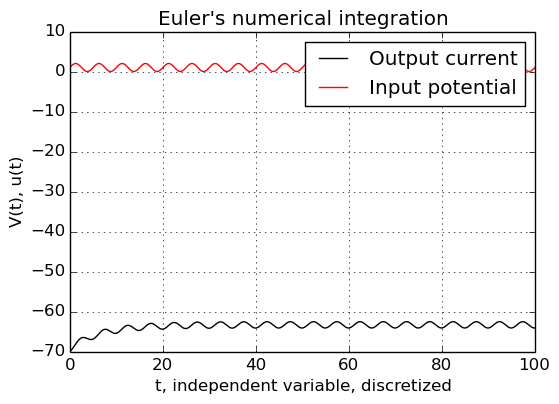

In [7]:
fig = figure("Numerical method",figsize=(6,4));    # Create a new figure, with desired size;

plot(t, V, "k-", label="Output current");              # Plot in the current figure, V(x) - the mumerical solution (output);
plot(t, u, "r-", label="Input potential");             # Plot in the current figure, u(x) - external input;

xlabel("t, independent variable, discretized");    # Label of the horizontal axis;
ylabel("V(t), u(t)");                              # Label of the vertical axis;
title("Euler's numerical integration");            # Label of the title, at the top of the figure;
grid("on");                                        # "Grid" on;

legend(borderaxespad=0.5);                     # Add a legend to the current axes; 

# Ploting V(t)+70 and u(t)-1 

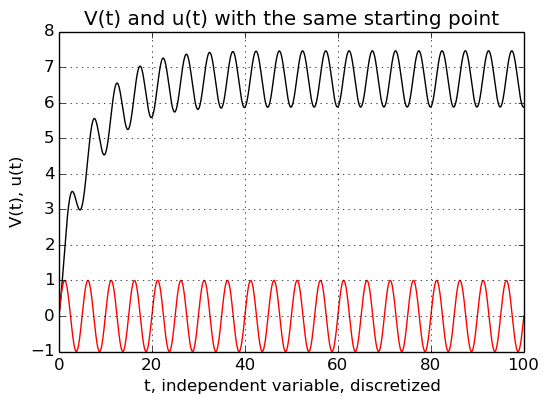

In [117]:
fig = figure("Numerical method", figsize=(6,4));    # Figure's size;   

plot(t, V + 70, "k-");                             # Plot in the current figure, V(x) - the mumerical solution (output) + 70;
plot(t, u - 1, "r-");                              # Plot in the current figure, u(x) - external input -1;

xlabel("t, independent variable, discretized ");      # Label of the horizontal axis;
ylabel("V(t), u(t)");                                 # Label of the vertical axis;   
title("V(t) and u(t) with the same starting point");  # Label of the title, at the top of the figure;
grid("on");                                           # "Grid" on;


Describe in words how the solution looks like 

#Isolation of V(t) steady-state 

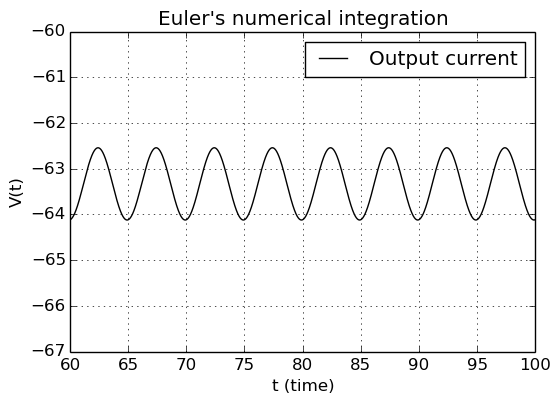

In [8]:
fig = figure("Numerical method",figsize=(6,4));    # Create a new figure, with desired size;
grid("on");                                        # "Grid" on;

plot(t, V, "k", label="Output current");           # Plot in the current figure, f(x) - the mumerical solution;

ax = gca();                                     # Get a "handle" on the current axes;
ax[:set_xlim]((60,100));                        # For axes "ax" set the horizontal limits - to isolate V(t) peaks;
ax[:set_ylim]((-67,-60));                       # For axes "ax" set the vertical limits - to isotate V(t) peaks;

xlabel("t (time)");                            # Label of the horizontal axis;
ylabel("V(t)");                                # Label of the vertical axis;
title("Euler's numerical integration");        # Label of the title, at the top of the figure;

legend(borderaxespad=0.5);                     # Add a legend to the current axes;

In [9]:
maximum(V) #Extracting its peak amplitude

-62.54311212698652

#Ploting of Peak amplitude as a function of F (frequency)

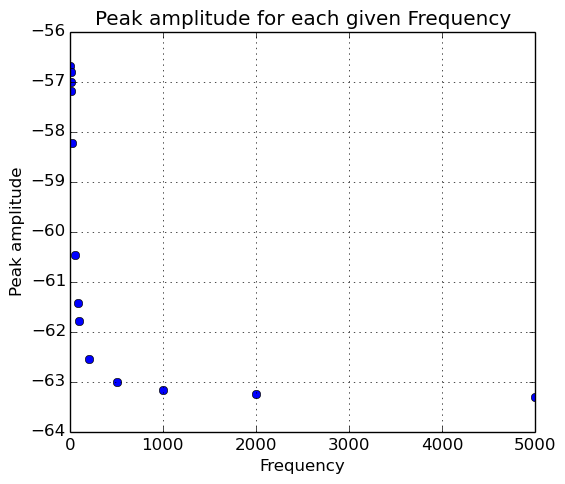

In [18]:
fig = figure("Numerical method",figsize=(6,5)); # Create a new figure, with desired size;
grid("on");                                     # "Grid" on;

F = [2 5 8 10 20 50 80 100 200 500 1000 2000 5000]; #Values for frequency;
A = [-56.689 -56.809 -57.012 -57.184 -58.222 -60.461 -61.427 -61.785 -62.543 -63.015 -63.174 -63.253 -63.301]; #values for peak; 
                                                                                                               #amplitude;


plot(F, A, "bo");            #Ploting peak amplitude as a function of F (frequency);

xlabel("Frequency");                            # Label of the horizontal axis;
ylabel("Peak amplitude");                       # Label of the vertical axis;
title("Peak amplitude for each given Frequency");     # Label of the title, at the top of the figure;

First I found peak amplitude one by one, changing everytime the frequency and then making use of the maximum(V) command. Then I made a graph where I ploted each point $(it's a vector, right?)$. With a tip from the professor I ploted this graph where I created two arrays for the Frequency and the amplitude. The result looks like a logarithm function and the professor chalanged to find a way to plot it in a loglog or semilog graph, that's what I did next. 

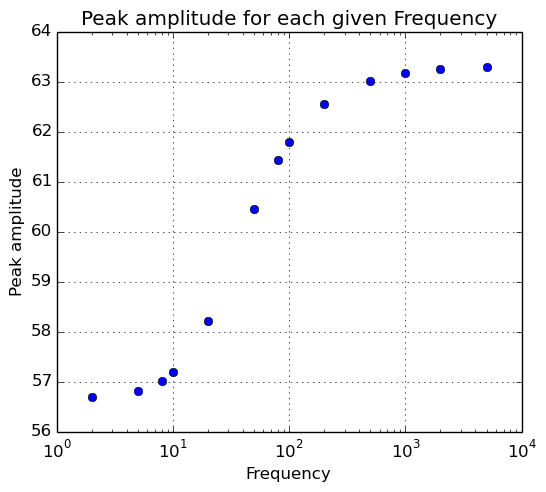

In [20]:
fig = figure("Numerical method",figsize=(6,5)); # Create a new figure, with desired size;
grid("on");                                     # "Grid" on;


semilogx( F, abs(A), "bo");              # Ploting semilogx graph of amplitude as a function of frequency; 

xlabel("Frequency");                               # Label of the horizontal axis;
ylabel("Peak amplitude");                          # Label of the vertical axis; 
title("Peak amplitude for each given Frequency");  # Label of the title, at the top of the figure;

Trying semilogx graph, abs(A) is necessary, stands for absolute value, you can't log negative numbers.

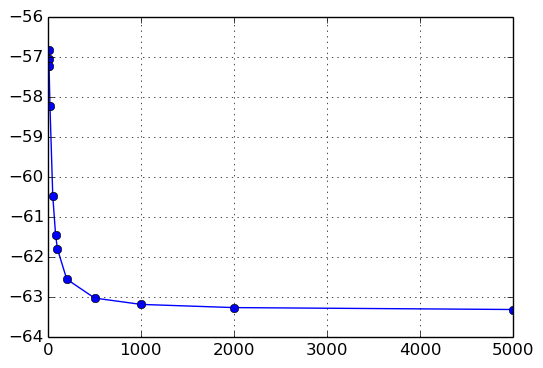

In [21]:
F = [2, 5, 8, 10, 20, 50, 80, 100, 200, 500, 1000, 2000, 5000]; #Frequency
M = zeros(13,1);

for x = 1:13

    for k = 2:N      # Loop over each discrete step for x;
        u[k]= sin(2*π*F[x]*0.001*(k-1)*Δt) + 1; # Eletric Input Current
        V[k] = V[k-1] + Δt*(0.15*(-70 - V[k-1]) + u[k-1]);    # Euler forward method output potential;
    end             # End of the loop;
    M[x] = maximum(V);
    
end

fig = figure("Peaks",figsize=(6,4));     # Create a new figure, with desired size;
plot(F, M, "ob-");                       # Plot in the current figure, f(x) - the mumerical solution;
grid("on");                              # "Grid" on;

I did this graph with the help of a friend. The professor challenge me to do a for loop in order to find the maximum value, I did several tries with no sucess, my friend introduced me to nested loops and showed me the solution, I liked it so much that I decided to leave it here. 

# Function with smaller Δt

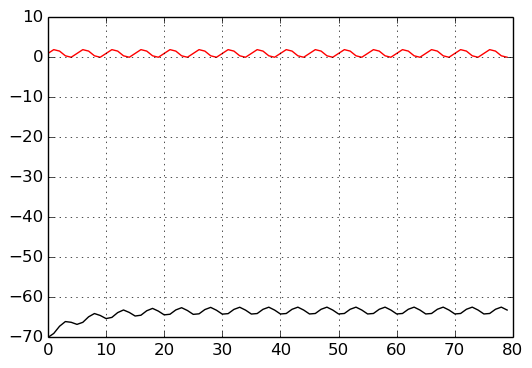

In [109]:
fig = figure("Numerical method", figsize=(6,4));    # Figure's size; 
grid("on");                                         # "Grid" on;

Δt = 1;        # Trying with a smaller width of the integration step;
N  = 80;      # Number of integration steps has to decrease;


V = zeros(N,1);      # Initialization of an array of N elements, filled with 0;
u = zeros(N,1);      # Initialization of an array of N elements, filled with 0;

V[1] = -70;          # Initial condition;
u[1] = 1             # Initial external input;
F = 200              # Frequency

for k=2:N,                                                # Loop over each discrete step for x;
    u[k] = sin(2*π*0.001*F*(k-1)*Δt) + 1                  # Electric input current;
    V[k] = V[k-1] + Δt*(0.15*(-70 - V[k-1]) + u[k-1]);    # Euler forward method;
end                                                       # End of the loop;

max = (N-1) * Δt;          # Value corresponding to the maximal integration step;
t   = 0:Δt:max;            # Init of an array of N elements, with increasing values (i.e. horizontal coordinate);

plot(t, V, "k-")    # Plot in the current figure, V(x) - the mumerical solution (output);
plot(t, u, "r-")    # Plot in the current figure, u(x) - external input;

A higher $Δt$ means that the distance between two consecutive points$(t)$ where we'll calculate the derivative of $V(t)$ will be bigger, and so a more imprecised picture will emerge. To get a function closer to the real function of $V(t)$ the smaller the $Δt$ the better. However, if $Δt$ is too small we'll need more integration steps (to be able to see the function's behaviour) resulting in a more laborious and time consuming process for the computer.  